Importo le librerie

In [1]:
import numpy as np

from random import randint

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import Input
from keras import Model
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

Importo dataset → mnist

In [2]:
#Importo mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Concateno
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [4]:
#TEST PER VEDERE IL CONTENUTO DEL DATASET
#Visualizzo 4 cifre random
#for i in range(4):
#    plt.subplot(2, 2, (i + 1))
    #in shape[0] ci sono il numero di cifre del dataset
#    plt.imshow(X_train[randint(0, X_train.shape[0])], cmap=plt.get_cmap('gray'))
#plt.show()

In [5]:
#calcolo numero pixel
n_pixel = X_train.shape[1] * X_train.shape[2] #28*28=784

#trasformo il vettore
X_train = X_train.reshape(X_train.shape[0], n_pixel)
X_test = X_test.reshape(X_test.shape[0], n_pixel)

#normalizzo i valori
X_train = X_train / 255
X_test = X_test / 255
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

#codifica one hot encode (consente di identificare la classe di appartenenza con 
#una stringa posizionale di cifre 0 e 1 lunga quanto il numero di classi)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# shape[1] lunghezza stringa=numero di classi (10)
n_classi = y_train.shape[1]

In [6]:
X_train.shape, X_test.shape

((49000, 784), (21000, 784))

Definisco la mia rete neurale

In [7]:
#creo modello
model = Sequential()
#layer
model.add(Dense(500, input_dim=n_pixel, activation='relu')) #primo strato nascosto
#model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
#model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))#layer di output

model.summary()

#Compilo modello
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


Alleno la mia rete neurale

In [14]:
progress=model.fit(X_train, y_train, validation_data=(X_test, y_test), validation_split=0.3, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
134/134 [==============================] - 3s 23ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.1049 - val_accuracy: 0.9771
Epoch 2/10
134/134 [==============================] - 3s 23ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.1260 - val_accuracy: 0.9724
Epoch 3/10
134/134 [==============================] - 3s 23ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.1210 - val_accuracy: 0.9712
Epoch 4/10
134/134 [==============================] - 3s 23ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.1130 - val_accuracy: 0.9756
Epoch 5/10
134/134 [==============================] - 3s 23ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.1233 - val_accuracy: 0.9729
Epoch 6/10
134/134 [==============================] - 3s 23ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.1342 - val_accuracy: 0.9722
Epoch 7/10
134/134 [==============================] - 3s 23ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.1928 - val_accuracy: 0.9597

Perdita accuratezza (accuracy)

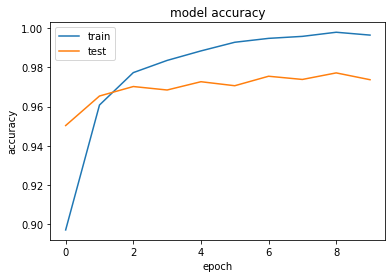

In [9]:
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perdita dell'errore (loss)

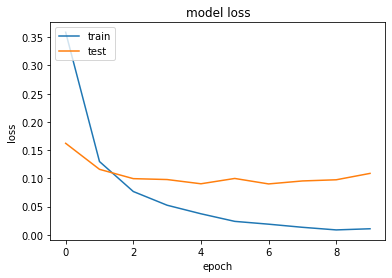

In [10]:
plt.plot(progress.history['loss'])
plt.plot(progress.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
test_predictions = model.predict_classes(X_test, batch_size=128, verbose=0)
test_labels=np.argmax(y_test, axis=1)
cm = confusion_matrix(test_labels, test_predictions)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


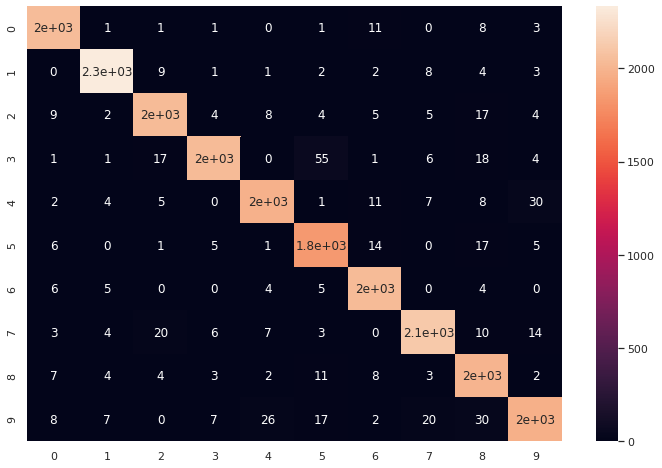

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(cm, annot=True)